In [2]:
#importar uber.csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f


In [3]:
# Step 1: Read the CSV file to load the data
uber_data = pd.read_csv('./uber_revisado2.csv', sep=',', encoding='utf-8')

# Step 2: Decide the features (X) and target variable (y)
# Assuming 'fare_amount' as the target variable and the rest as features
features = ['passenger_count',  'pickup_time', 'distancia']
X = uber_data[features]
y = uber_data['fare_amount']

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Return the shapes of the splits as a confirmation
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((152036, 3), (38009, 3), (152036,), (38009,))

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import f
from sklearn import preprocessing

def fit_linear_model(X, y):
    estimators = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return estimators


def linear_model(X, estimators):
    y = np.dot(X, estimators)
    
    return y

def model_metrics(X, y):
    

    """
    Obtener algunos métricos del modelo.
    Argumentos:
        X: una lista de características.
        y: una lista de etiquetas.
    Devolución:
        métricas: una lista con las siguientes métricas (estimadores, SST, SSE, SSR, R ^ 2, varianza)

    """
    estimators = fit_linear_model(X, y)
    y_ests = linear_model(X, estimators)
    y_mean = np.mean(y)
    sst = np.sum((y - y_mean) ** 2)
    sse = np.sum((y_ests - y_mean) ** 2)
    ssr = np.sum((y - y_ests) ** 2)
    r_2 = 1 - (ssr / sst)
    variance = ssr / (X.shape[0] - (X.shape[1] + 1))
    metrics = [estimators, sst, sse, ssr, r_2, variance]
    
    return metrics

def get_variance(X, y):
    """
    Obtener la varianza de cada estimador.
    Argumentos:
        X: una lista de características.
        y: una lista de etiquetas.
    Devolución:
        vars_j: una lista con var_j de cada característica.
    """
    vars_j = []
    _, _, _, _, _, full_model_variance = model_metrics(X, y)
    for j in range(X.shape[1]):
        X_out_j = np.delete(X, j, axis=1)
        _, _, _, _, _, reduced_model_variance = model_metrics(X_out_j, y)
        var_j = (full_model_variance - reduced_model_variance) / (full_model_variance * reduced_model_variance)
        vars_j.append(var_j)
    
    return vars_j

In [5]:

# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala las características
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [6]:
# Funcion para obtener estimadores
def fit_linear_model(X, y):
    """
    Ajuste de los estimadores del modelo lineal.
    Argumentos:
        X: una lista de valores.
        y: una lista de valores.
    Devolución:
        estimadores: una lista con b_1_est y b_0_est.
    
    """
    # Creación de una matriz de unos.
    ones_array = np.ones(X.shape[1])
    # Concatenación de matrices.
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    # Ajuste de los estimadores
    estimators = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return estimators

In [7]:

def linear_model(X, estimators):
    ones_array = np.ones((len(X), 1))
    X = np.hstack((X, ones_array))
    y = np.dot(X, estimators)
    
    return y

In [8]:
def model_metrics(X, y):
    """
    obtener algunas metricas del modelo
    Argumentos:
        X: una lista de características.
        y: una lista de etiquetas.
    Devolución:
        métricas: una lista con las siguientes métricas (estimadores, SST, SSE, SSR, R ^ 2, varianza)
    """


    estimators = fit_linear_model(X, y)
    y_ests = linear_model(X, estimators)
    y_mean = np.array(y).mean()
    sst = np.array([(y_i - y_mean) ** 2 for y_i in y]).sum()
    sse = np.array([(y_i_est - y_mean) ** 2 for y_i_est in y_ests]).sum()
    ssr = np.array([(y[i] - y_ests[i]) ** 2 for i in range(len(y))]).sum()
    r_2 = ssr / sst
    variance = ssr / (X.shape[0] - (X.shape[1] + 1))
    metrics = [estimators, sst, sse, ssr, r_2, variance]
    
    return metrics

In [9]:
def get_variance(X, y):

    """
        Obtener la varianza de cada estimador.
        Argumentos:
            X: una lista de características.
            y: una lista de etiquetas.
        Devolución:
            vars_j: una lista con var_j de cada característica.
    """
    vars_j = list()
    for j in range(X.shape[1]):
        X_out_j = np.delete(X, j, axis = 1)
        X_j = X[:, j]
        _, sst, sse, ssr, r_2, variance = model_metrics(X_out_j, X_j)
        var_j = variance / (sst * (1 - r_2))
        vars_j.append(abs(var_j))
        
    return vars_j

In [10]:
estimators = fit_linear_model(X_train_scaled, y_train)

Obtner las variables de cada estimador

In [11]:
vars_j = get_variance(X_train_scaled, y_train)

In [12]:
count = 0
for var_j, estimator in zip(vars_j, estimators):
    print(f'For feature {count}: b_{count} = {estimator:5.2f}, var = {var_j:5.2f}')
    count += 1

For feature 0: b_0 =  0.02, var =  0.00
For feature 1: b_1 =  0.09, var =  0.00
For feature 2: b_2 =  2.84, var =  0.00


In [13]:
N = 100000
distributions = list()
desv = np.array([np.sqrt(vars_j[i]) for i in range(len(vars_j))])

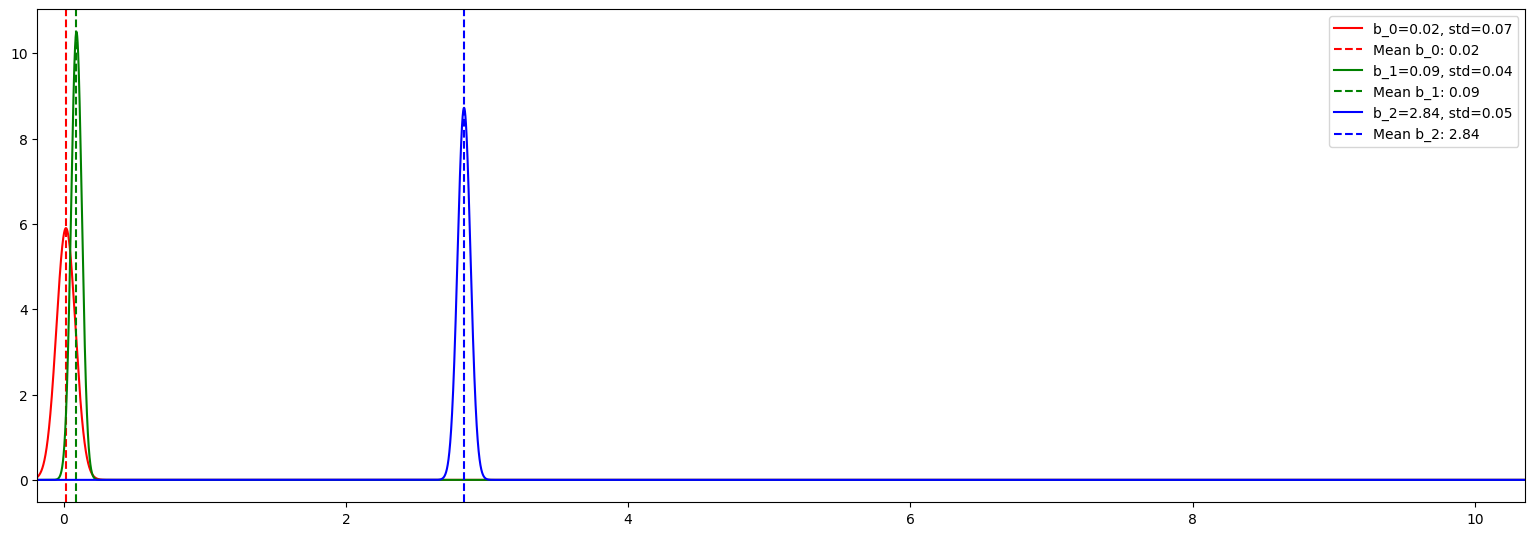

In [14]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink']
count = 0

width_cell = plt.rcParams['figure.figsize'][0]

x = np.linspace(min(estimators) - 3 * max(desv), max(estimators) + 3 * max(desv), N)
for estimator, dev in zip(estimators, desv):
    y = norm.pdf(x, estimator, dev)
    # Funcion de probabilidad de densidad.
    plt.plot(x, y, color=colors[count], label=f'b_{count}={estimator:.2f}, std={dev:.2f}')
    plt.axvline(x=estimator, color=colors[count], linestyle='--', label=f'Mean b_{count}: {estimator:.2f}')
    plt.gcf().set_size_inches(width_cell * 3, width_cell)
    count += 1

plt.xlim(min(estimators) - 3 * max(desv), max(estimators) + 3 * max(desv))
plt.legend()
plt.show()

In [15]:
def t_test(estimator, desv, n, len_d, alpha=0.05, two_sided=True):
    """
        prueba t.
        Argumentos:
            estimadores: un valor flotante.
            desvs: un valor flotante.
            n: tamaño de la muestra.
            len_d: un tamaño de estimadores.
            alpha: un valor flotante.
            two_sided: un valor booleano.
        Devolución:
            prueba: un valor booleano.
            valor crítico: un valor flotante.
            t_i: un valor flotante.
            dof: un valor entero.
    """
    t_i = estimator / desv
    dof = n - len_d - 1
    if two_sided:
        critical_value = t.ppf(1 - (alpha / 2), dof)
        test = np.abs(t_i) > critical_value
    else:
        critical_value = t.ppf(1 - alpha, dof)
        test = t > critical_value
        
    return [test, critical_value, t_i, dof]

In [16]:
n = len(X_train_scaled)
two_sided = True
t_test_result = [t_test(estimator, des, n, len(desv), two_sided=two_sided) for des, estimator in zip(desv, estimators)]
count = 0
for t_test_i in t_test_result:
    print(f'Para la caracteristica {count},  Valor Critico: {t_test_i[1]:.2f}, valor t: {t_test_i[2]:25.2f}. Resultado del test: {t_test_i[0]}')
    t_test_i.append(count)
    count += 1

Para la caracteristica 0,  Valor Critico: 1.96, valor t:                      0.23. Resultado del test: False
Para la caracteristica 1,  Valor Critico: 1.96, valor t:                      2.38. Resultado del test: True
Para la caracteristica 2,  Valor Critico: 1.96, valor t:                     62.04. Resultado del test: True


c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6703: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))
c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6703: RuntimeWarning: overflow encountered in multiply
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))


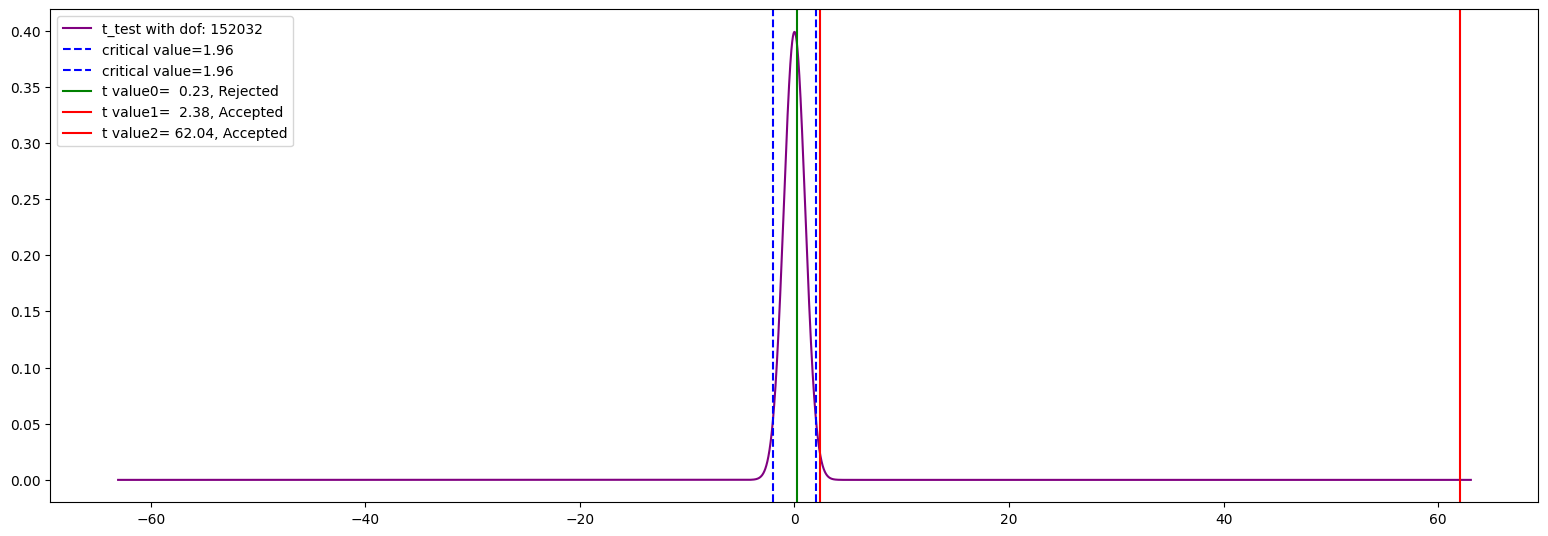

Para la ultima caracteristica el valor t es tan grande que no es posible mostrarlo en la grafica
t value 2, Aceptado


In [17]:
t_i = [t_test_i[2] for t_test_i in t_test_result[:4]]
min_t = min(t_i)
max_t = max(t_i)
t_i = [[t_test_i[2], t_test_i[-1]] for t_test_i in t_test_result[:4]]
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
width_cell = plt.rcParams['figure.figsize'][0]
dof = t_test_result[0][-2]
x = np.linspace(-max_t - 1, max_t + 1, N)
y = t.pdf(x, dof)
plt.plot(x, y, color='purple', label=f't_test with dof: {dof}')
plt.axvline(x=t_test_result[0][1], color='blue', linestyle='--', label=f'critical value={t_test_result[0][1]:.2f}')
if two_sided:
    plt.axvline(x=-t_test_result[0][1], color='blue', linestyle='--', label=f'critical value={t_test_result[0][1]:.2f}')
for i in t_i:
    if i[0] > t_test_result[0][1] or i[0] < -t_test_result[0][1]:
        plt.axvline(i[0], color ='red', label=f't value{i[1]}={i[0]:6.2f}, Accepted')
    else:
        plt.axvline(i[0], color ='green', label=f't value{i[1]}={i[0]:6.2f}, Rejected')
plt.gcf().set_size_inches(width_cell * 3, width_cell)
plt.legend()
plt.show()
print("Para la ultima caracteristica el valor t es tan grande que no es posible mostrarlo en la grafica")
last_features = t_test_result[-1:]
for feature in last_features:
    print(f't value {feature[-1]}, Aceptado')

In [18]:

def f_test(X, y, param_idx, alpha=0.05):
    """
        f-test.
        Argumentos:
            X: una lista de valores.
            y: una lista de valores.
            param_idx: un valor entero.
            alpha: un valor flotante.
        Devolución:
            prueba: un valor booleano.
            F: un valor flotante.
            p_value: un valor flotante.
    """
    n, k = X.shape
    q = 1  
    df_numerator = q
    df_denominator = n - k - 1
    
    X_restricted = X.copy()
    X_restricted[:, param_idx] = 0  
    model_restricted = fit_linear_model(X_restricted, y)
    
    SST = np.sum((y - np.mean(y))**2)
    
    y_pred_restricted = linear_model(X_restricted, model_restricted)
    SSE_restricted = np.sum((y - y_pred_restricted)**2)
    
    F = ((SST - SSE_restricted) / df_numerator) / (SSE_restricted / df_denominator)
    
    p_value = 1 - f.cdf(F, df_numerator, df_denominator)
    
    inferior_interval = f.ppf(alpha / 2, df_numerator, df_denominator)
    superior_interval = f.ppf(1 - alpha / 2, df_numerator, df_denominator)
    if p_value > superior_interval or p_value < inferior_interval:
        test = True
    else: 
        test = False
    
    return [test, F, p_value]

In [19]:
num_params = X.shape[1]
list_values = list()
for param_idx in range(0, num_params):
    test, F_statistic, p_value = f_test(X_train_scaled, y_train, param_idx)
    list_values.append([test, F_statistic, p_value])

In [20]:
count = 0
for list_values_i in list_values:
    print(f'Para la caracteristica {count}, F stadistico: {list_values_i[1]}, p value: {list_values_i[2]}. Resultado Test: {list_values_i[0]}')
    count += 1


For feature 0, F statistc: 37117.2290477599, p value: 1.1102230246251565e-16. Result test: True
For feature 1, F statistc: 37072.23130771492, p value: 1.1102230246251565e-16. Result test: True
For feature 2, F statistc: 229.60937541656796, p value: 1.1102230246251565e-16. Result test: True


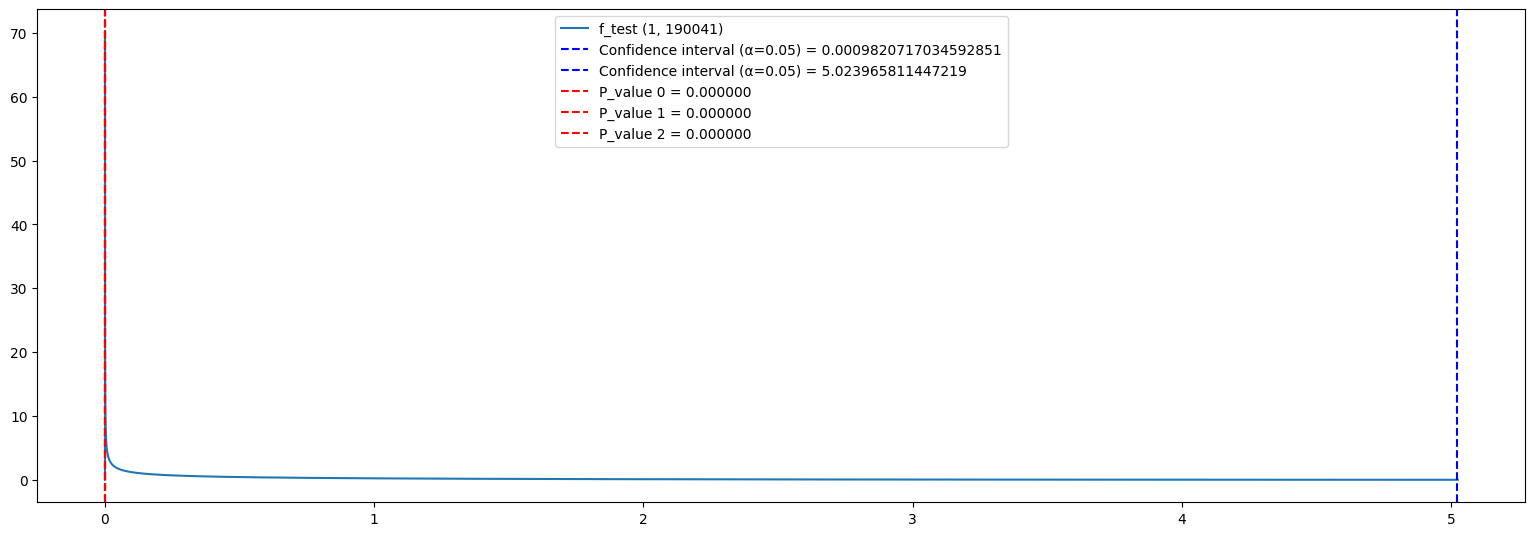

In [21]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
# Obtener el ancho de la celda actual (en pulgadas).
width_cell = plt.rcParams['figure.figsize'][0]

# Grados de libertad para el numerador y el denominador de la distribución F.
degrees_freedom_num = 1
degrees_freedom_denom = X.shape[0] - X.shape[1] - 1
F_statistics = [list_value[1] for list_value in list_values]
F_min = min(F_statistics)


# Calcilar el intervalo de confianza del 95%.
alpha = 0.05
inferior_interval = f.ppf(alpha / 2, degrees_freedom_num, degrees_freedom_denom)
superior_interval = f.ppf(1 - alpha / 2, degrees_freedom_num, degrees_freedom_denom)

# Generar datos para la distribución F.
x = np.linspace(inferior_interval - 0.001, superior_interval + 0.001, N)
y = f.pdf(x, degrees_freedom_num, degrees_freedom_denom)



# Crear el gráfico.
plt.figure(figsize=(12, 6))
plt.plot(x, y, label=f'f_test ({degrees_freedom_num}, {degrees_freedom_denom})')
plt.axvline(inferior_interval, color='b', linestyle='--', label=f'Intervalo de confianza (α={alpha}) = {inferior_interval}')
plt.axvline(superior_interval, color='b', linestyle='--', label=f'Intervalo de confianza (α={alpha}) = {superior_interval}')
count = 0
for values in list_values:
    if values[2] > inferior_interval or values[2] < superior_interval:
        plt.axvline(values[2], color='r', linestyle='--', label=f'P valor {count} = {values[2]:f}')
    else:
        plt.axvline(values[2], color='g', linestyle='--', label=f'P valor {count} = {values[2]:f}')
    count += 1
plt.gcf().set_size_inches(width_cell * 3, width_cell)

# Mostrar el gráfico.
plt.legend()
plt.show()